In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('finalresults.csv')

In [10]:
del df['Unnamed: 0']
df.shape

(2752030, 9)

In [9]:
df.describe()

,City_Count,Score,lat,lng,pop
count,2752030.000000,2752030.000000,2327174.000000,2327174.000000,2327174.000000
mean,73901.549557,94.233702,19.525248,-3.815606,2979077.095382
std,103102.610865,9.574984,28.050473,80.551531,4085219.942710
min,1.000000,60.000000,-89.982894,-174.200489,-99.000000
25%,1982.000000,90.000000,1.293033,-84.543248,227461.000000
50%,14123.000000,100.000000,28.600023,-1.133249,1104641.500000
75%,89570.000000,100.000000,39.928892,72.580004,4236614.500000
max,307959.000000,100.000000,81.716626,179.383304,22006299.500000


In [16]:
# inp = pd.read_csv('../Data/Input_Data.txt', sep='|', index_col=False, 
#                  names=['City', 'Country Code', 'X', 'Y'])
# inp.describe()

In [17]:
# cinp = pd.read_csv('../clean_input.csv')
# del cinp['Unnamed: 0']
# cinp.describe()

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

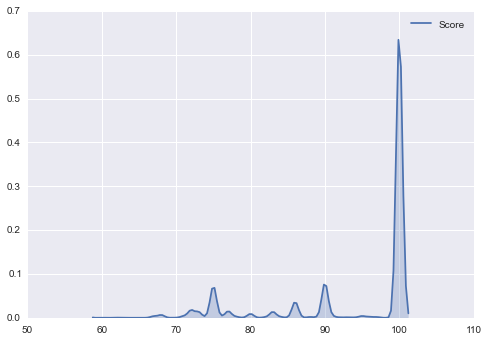

In [26]:
## density plot
sns.kdeplot(df.Score, shade=True)

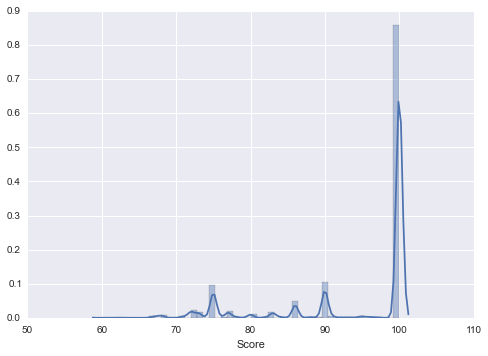

In [20]:
sns.distplot(df.Score)

(array([    2279.,    10579.,    29793.,   300208.,    55638.,    70299.,
          112159.,   248303.,    19634.,  1903138.]),
 array([  60.,   64.,   68.,   72.,   76.,   80.,   84.,   88.,   92.,
          96.,  100.]),
 <a list of 10 Patch objects>)

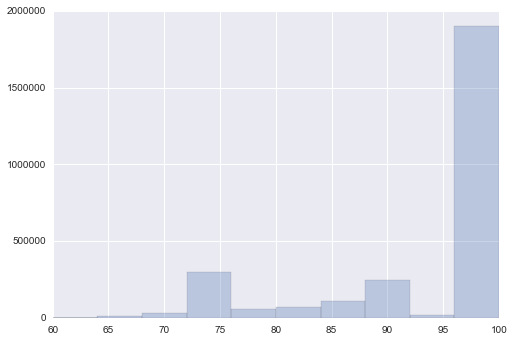

In [21]:
plt.hist(df.Score, alpha=.3)

The output file should be provided as a pipe '|' delimited .txt file. 

For each transaction of the input file it should contain four fields: 

Input_City, Input_CountryCode, Output_City, Output_CountryName. 

Other descriptions or Lat Long pairs may be added as additional output fields.

In [58]:
df.head()

,Clean_City,Clean_Code,City_Count,Corrected_City,Score,Clean_Country,lat,lng,pop
0,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127
1,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127
2,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127
3,CENTURION,ZA,70,CENTURION,72,SOUTH AFRICA,NaN,NaN,NaN
4,CENTURION,ZA,70,CENTURION,72,SOUTH AFRICA,NaN,NaN,NaN


In [70]:
# df.isnull().any()

In [71]:
# df[df['Clean_Code'].isnull()]

In [77]:
finaldf = df[['Clean_City', 'Clean_Code', 'Corrected_City', 'Clean_Country', 'Score', 'lat', 'lng', 'pop']]

In [78]:
finaldf.head()

,Clean_City,Clean_Code,Corrected_City,Clean_Country,Score,lat,lng,pop
0,ANDORRA,AD,ANDORRA,ANDORRA,100,42.500001,1.516486,38127
1,ANDORRA,AD,ANDORRA,ANDORRA,100,42.500001,1.516486,38127
2,ANDORRA,AD,ANDORRA,ANDORRA,100,42.500001,1.516486,38127
3,CENTURION,ZA,CENTURION,SOUTH AFRICA,72,NaN,NaN,NaN
4,CENTURION,ZA,CENTURION,SOUTH AFRICA,72,NaN,NaN,NaN


In [85]:
finaldf.columns = ['Input_City', 'Input_CountryCode', 'Output_City', 'Output_CountryName', 'Score', 'Lat', 'Long', 'Population']

In [86]:
finaldf.head()

,Input_City,Input_CountryCode,Output_City,Output_CountryName,Score,Lat,Long,Population
0,ANDORRA,AD,ANDORRA,ANDORRA,100,42.500001,1.516486,38127
1,ANDORRA,AD,ANDORRA,ANDORRA,100,42.500001,1.516486,38127
2,ANDORRA,AD,ANDORRA,ANDORRA,100,42.500001,1.516486,38127
3,CENTURION,ZA,CENTURION,SOUTH AFRICA,72,NaN,NaN,NaN
4,CENTURION,ZA,CENTURION,SOUTH AFRICA,72,NaN,NaN,NaN


In [91]:
print len(finaldf[finaldf['Lat'].isnull()])
print len(finaldf[finaldf['Long'].isnull()])
print len(finaldf[finaldf['Population'].isnull()])
print len(finaldf)

424856
424856
424856
2752030


In [93]:
float(len(finaldf[finaldf['Lat'].isnull()])) / float(len(finaldf))

0.1543791310414494

In [95]:
finaldf.describe()

,Score,Lat,Long,Population
count,2752030.000000,2327174.000000,2327174.000000,2327174.000000
mean,94.233702,19.525248,-3.815606,2979077.095382
std,9.574984,28.050473,80.551531,4085219.942710
min,60.000000,-89.982894,-174.200489,-99.000000
25%,90.000000,1.293033,-84.543248,227461.000000
50%,100.000000,28.600023,-1.133249,1104641.500000
75%,100.000000,39.928892,72.580004,4236614.500000
max,100.000000,81.716626,179.383304,22006299.500000


In [98]:
finaldf.to_csv('Output.txt', sep='\t')